In [ ]:
#!pip install tensorboard tensorflow pandas

"""
If tensorboard is not installed (or other dependencies, such as tensorflow and pandas),
uncomment the command in top and re-run. This needs only to be run once in a Jupyter kernel.
"""

%load_ext tensorboard

from tensorflow.python.summary.summary_iterator import summary_iterator
import pandas as pd

In [ ]:
"""
Change the LOG_DIR argument to point to the correct directory, you may want to use an
absolute path if you run into issues.
"""
%tensorboard --logdir ../logging

In [ ]:
def logs_to_pandas(path: str) -> pd.DataFrame:
    """convert single tensorflow log file to pandas DataFrame
    Parameters
    ----------
    path : str
        path to tensorflow log file
    Returns
    -------
    pd.DataFrame
        converted dataframe
    """

    runlog_data = pd.DataFrame({"metric": [], "value": [], "step": [], "wall_time": []})
    try:
        event_acc = summary_iterator(path)
        for event in list(event_acc)[1:]:
            step, wall_time = event.step, pd.to_datetime(event.wall_time, unit='s')
            simple_extractor = [{"metric": v.tag, "value": v.simple_value, "step": step, 'wall_time': wall_time} for v in event.summary.value]
            event_r = pd.DataFrame(simple_extractor)
            runlog_data = pd.concat([runlog_data, event_r])
    # Dirty catch of DataLossError
    except Exception as e:
        print("Event file possibly corrupt: {}".format(path))
        print(e)
    return runlog_data

In [393]:
import re
import numpy as np
import os

job_hash_pattern = r'(?<=Deploying on cluster: ).*'
job_id_pattern = r'Arrival train_job_[0-9]*'
train_job_patern = r'train_job_[0-9]*'
epoch_pattern = r'(?<=total_epochs=)[0-9]*'

def match_jobs_to_params(params, log_root, log_file):
    
    
    log_txt = open(log_file, 'r').read()
    hash_matches = re.findall(job_hash_pattern, log_txt)
    job_matches = [m.split('Arrival ')[1] for m in\
                   re.findall(job_id_pattern, log_txt)]
    
    if len(hash_matches) != len(job_matches):
        print('yo, matches not the same')
#     if job_hashes.size != len(job_matches):
#         print('params/jobs wrong')
        
    job_hash = {}
    param_hash = {}
    for i in range(len(job_matches)):
        job_hash[job_matches[i]] = hash_matches[i]
#         param_hash[str(values[i])] = hash_matches[i]
        
    all_keys = list(params.keys())
    [v1, v2, v3] = list(params.values())
    array_shape = tuple([len(v) for v in params.values()])
    job_hashes = np.empty(array_shape).astype('str')
    param_hashes = np.empty(array_shape).astype('str')
    
    log_files = []
    for path, subdirs, files in os.walk(log_root):
        log_files += [os.path.join(path, f) for f in files]
    
    out_dict = {}
    print(job_hash)
    for lf in log_files:
        print(lf)
        df = logs_to_pandas(lf)
        acc, rt, st, et = extract_info_from_df(df)
        print({'acc':np.mean(acc), 'rt':np.mean(rt), 'total':(et-st).total_seconds()})
#     for job_id, hsh in job_hash.items():
#         if hsh in lf:
#             out_dict[job_id] = {'acc':acc, 'rt':rt,
#                             'st':st, 'et':et}
    
    
    
    
    
    return out_dict

match_jobs_to_params({
    "batchSizes" : [128, 256],
    "epoch_values" : [3, 6],
    "cpus": ["500m", "1000m", "2000m"]
}, r'../logs/cluster_exp_nazar', r'../logs/cluster_exp.txt')

{'train_job_9': '934e668b-4068-4c6c-bbb9-7a8fbe5dac34', 'train_job_2': '7857588b-c19e-4b19-b0a0-58b56f5f227f', 'train_job_4': 'a7eea8c3-4dba-4ad1-8f6c-5ff620f38724', 'train_job_6': 'ef8457a0-ba25-4ff3-ade2-9a16f8ddec30', 'train_job_7': '9f82a6c1-7b98-4632-8bef-9fa5d5032339', 'train_job_3': 'e59142f0-f1ea-48d3-bc16-81c607791a5c', 'train_job_10': 'ae35d77b-13eb-4a3f-8833-124446b0c463', 'train_job_11': 'd7eaf4ef-4390-409f-9a42-0a4533f02044', 'train_job_0': '35b17fa0-9da7-45dc-9363-46f1dcecc7c1', 'train_job_1': '0f8f2ec2-3875-4caf-8909-401ce0be27f9', 'train_job_5': '6b7007f8-55db-48a1-8176-b429399acce8', 'train_job_8': 'eb49e1f6-df32-49da-aea5-bce3e10eb46e'}
../logs/cluster_exp_nazar/0/cloud_experiment_0612cfe7-70da-4d75-8eba-ddfe753c2cda/0/Nets.mnist_cnn_Dataset.mnist/events.out.tfevents.1667171976.trainjob-0612cfe7-70da-4d75-8eba-ddfe753c2cda-master-0.1.0
{'acc': 76.88799896240235, 'rt': 0.000113, 'total': 191.221297}
../logs/cluster_exp_nazar/0/cloud_experiment_06affa9a-e7b8-4912-b3a0-9

{'acc': 74.53199920654296, 'rt': 0.000123, 'total': 632.199762}
../logs/cluster_exp_nazar/0/cloud_experiment_9def287f-3c74-4fa6-8142-45efd7e89e04/0/Nets.mnist_cnn_Dataset.mnist/events.out.tfevents.1667172458.trainjob-9def287f-3c74-4fa6-8142-45efd7e89e04-master-0.1.0
{'acc': 73.24400024414062, 'rt': 0.000109, 'total': 59.74217}
../logs/cluster_exp_nazar/0/cloud_experiment_9f82a6c1-7b98-4632-8bef-9fa5d5032339/0/Nets.mnist_cnn_Dataset.mnist/events.out.tfevents.1667176777.trainjob-9f82a6c1-7b98-4632-8bef-9fa5d5032339-master-0.1.0
{'acc': 72.90999984741211, 'rt': 0.0001115, 'total': 27.800051}
../logs/cluster_exp_nazar/0/cloud_experiment_a1c1f4e3-d94e-45f1-b80e-0c0e209cae2a/0/Nets.mnist_cnn_Dataset.mnist/events.out.tfevents.1667177714.trainjob-a1c1f4e3-d94e-45f1-b80e-0c0e209cae2a-master-0.1.0
{'acc': 72.84000015258789, 'rt': 0.0001165, 'total': 25.399206}
../logs/cluster_exp_nazar/0/cloud_experiment_a7eea8c3-4dba-4ad1-8f6c-5ff620f38724/0/Nets.mnist_cnn_Dataset.mnist/events.out.tfevents.1667

{}

In [382]:
def extract_info_from_df(df):
    acc = []
    rt = []
    for i in range(len(df.index)):
        if 'accuracy' in df['metric'].iloc[i]:
            acc.append(df['value'].iloc[i])
            rt.append((df['wall_time'].iloc[i] - df['wall_time'].iloc[i-1]).total_seconds())
    try:
        st = df['wall_time'].iloc[0]
        et = df['wall_time'].iloc[-1]
    except:
        st = None
        et = None
    return acc, rt, st, et




system: []
queue: []
----------------------
system: []
queue: ['0712f30b-e5c5-4d83-b3cd-51f9a7195544']
----------------------
system: []
queue: ['0712f30b-e5c5-4d83-b3cd-51f9a7195544']
----------------------
system: []
queue: ['0712f30b-e5c5-4d83-b3cd-51f9a7195544', '1ff5f277-56b5-4d42-9d96-b0800d654f8f', '984f2cd4-90ad-4934-941e-b0296aae1718', '7c9bbef6-877b-49c3-98f3-38a8df86d0ff', 'a6da2801-7205-4090-b28d-b2418c11b7bd']
----------------------
system: []
queue: ['0712f30b-e5c5-4d83-b3cd-51f9a7195544', '1ff5f277-56b5-4d42-9d96-b0800d654f8f', '984f2cd4-90ad-4934-941e-b0296aae1718', '7c9bbef6-877b-49c3-98f3-38a8df86d0ff', 'a6da2801-7205-4090-b28d-b2418c11b7bd']
----------------------
system: ['7c9bbef6-877b-49c3-98f3-38a8df86d0ff', 'a6da2801-7205-4090-b28d-b2418c11b7bd']
queue: ['0712f30b-e5c5-4d83-b3cd-51f9a7195544', '1ff5f277-56b5-4d42-9d96-b0800d654f8f', '984f2cd4-90ad-4934-941e-b0296aae1718']
----------------------
system: ['7c9bbef6-877b-49c3-98f3-38a8df86d0ff', 'a6da2801-7205-4090

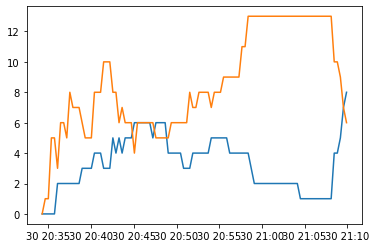

In [456]:
import re
import glob
import datetime
import pandas as pd
import matplotlib.pyplot as plt
jobs = []
inters = []
start_times = []
arrival_times = []
end_times = []
job_file = "../logs/heterogeneous_1.log"

with open(job_file) as f:
    for line in f:
        if re.search(r'(?<=Deploying on cluster: ).*', line):
            words = line.split()
            arrival_time = f"{words[0]} {words[1]}"
            arrival_time = pd.to_datetime(arrival_time,format= "%m-%d-%Y %H:%M:%S" )
            job = words[-1]
            try:
                path = glob.glob(f"../logs/cluster_log_arnoud/0/cloud_experiment_{job}/0/Nets.mnist_cnn_Dataset.mnist/*")[0]
            except:
                continue
            data = logs_to_pandas(path)
            start_time = data["wall_time"].iloc[0]
            end_time = data["wall_time"].iloc[-1]
            jobs.append([job, arrival_time, start_time, end_time])
            inters.append([job, (start_time - arrival_time).total_seconds(), (end_time-start_time).total_seconds()])
            
system = []
queue = []

tick_seconds = (jobs[-1][-1] - jobs[0][1]).total_seconds()
tick = jobs[0][1]
n_ticks = 100
tick_times = []


for t in range(n_ticks):
    system_jobs = []
    queue_jobs = []
    for j in jobs:
        [job, arrival_time, start_time, end_time] = j
        if start_time < tick:
            if end_time > tick:
                system_jobs.append(job)
        elif arrival_time < tick:
            queue_jobs.append(job)
    tick += datetime.timedelta(seconds=tick_seconds/n_ticks)
    tick_times.append(tick)
    system.append(system_jobs)
    queue.append(queue_jobs)

for i in range(len(system)):
    print('system: ' + str(system[i]))
    print('queue: '+ str(queue[i]) )
    print('----------------------')
    
plt.plot(tick_times, [len(s) for s in system])
plt.plot(tick_times, [len(q) for q in queue])



In [ ]:
import re
import numpy as np

def match_config_to_jobs(configs, job_files):
    pattern = r'(?<=Deploying on cluster: ).*'
    matches = []
    for job_file in job_files:
        text = open(job_file, 'r').read()
        matches += re.findall(pattern, text)
    
    list_keys = list(configs.keys())
    
    [v1, v2, v3, v4, v5] = list(configs.values())
    
    array_shape = tuple([len(v) for v in configs.values()])
    jobs_arr = np.empty(array_shape).astype('str')
    cfg_arr = np.empty(array_shape).astype('S200')
    
    counter = 0
    config_dict = {}
    for i in range(len(v1)):
        config_dict[v1[i]] = {}
        for j in range(len(v2)):
            config_dict[v1[i]][v2[j]] = {}
            for k in range(len(v3)):
                config_dict[v1[i]][v2[j]][v3[k]] = {}
                for l in range(len(v4)):
                    config_dict[v1[i]][v2[j]][v3[k]][v4[l]] = {}
                    for m in range(len(v5)):
                        config_dict[v1[i]][v2[j]][v3[k]][v4[l]][v5[m]] =\
                        matches[counter]
                        jobs_arr[i,j,k,l,m] = matches[counter]
                        cfg_arr[i,j,k,l,m] = f"{list_keys[0]}:{v1[i]} --- {list_keys[1]}:{v2[j]} --- {list_keys[2]}:{v3[k]} --- {list_keys[3]}:{v4[l]} --- {list_keys[4]}:{v5[m]}"
                        counter += 1
                        
 
    return config_dict, jobs_arr, cfg_arr

In [ ]:
import os

def job_name_to_df(root_dir, exp_prefix, jobs_arr, epochs):
    acc_arr = np.full(np.shape(jobs_arr) + (epochs - 1,), None)
    rt_arr = np.full(np.shape(jobs_arr)+ (epochs - 1,), None)
    st_arr = np.full(np.shape(jobs_arr), None)
    et_arr = np.full(np.shape(jobs_arr), None)
        
    for path, subdirs, files in os.walk(root_dir):
        for subdir in subdirs:
            if exp_prefix in subdir:
                job_in_subdir_name = np.vectorize(lambda x: x in subdir)
                jobs_loc = np.where(job_in_subdir_name(jobs_arr))
                if all(a.size > 0 for a in jobs_loc):
                    files_found = []
                    for path2, subdirs2, files2 in os.walk(os.path.join(path, subdir)):
                        files_found += [os.path.join(path2, f) for f in files2]
                    if len(files_found) >= 1:
                        df = logs_to_pandas(files_found[0])
                        acc, rt, st, et = extract_info_from_df(df)
                        if len(acc) < epochs - 1:
                            acc = np.array([0]*(epochs-1))
                        if len(rt) < epochs - 1:
                            rt = np.array([np.inf]*(epochs-1))
                        acc_arr[jobs_loc] = acc[:epochs-1]
                        rt_arr[jobs_loc] = rt[:epochs-1]
                        st_arr[jobs_loc] = st
                        et_arr[jobs_loc] = et
                    if len(files_found) != 1:
                        print(f'found {len(files_found)} log files instead of 1 for {subdir}')
    rt_arr[np.where(rt_arr == None)] = np.inf
    acc_arr[np.where(acc_arr == None)] = -np.inf
    return acc_arr, rt_arr, st_arr, et_arr
            

In [440]:

nazar_configs = {'model':['fashion_mnist'],
                'cores':[500,1000,2000],
                'memory':[0.5,1,2],
                'parallelism':[2,3,5],
                'seed':[42,13,30]}

job_files = [r'../logs/500_27jobs/fl_server_logs.txt',
             r'../logs/1000_27jobs/fl_server_logs.txt',
             r'../logs/2000_27jobs/fl_server_logs.txt']

# arnoud_configs = {'model':['MNISTCNN'],
#                   'seed':[42,13,30],
#                   'cores':[500,1000,2000],
#                   'memory':[0.5,1,2],
#                   'parallelism':[2,3,5]}

# arnoud_files = [r'../logs/mnist-1.txt',
#                 r'../logs/mnist-2.txt',
#                 r'../logs/mnist-3.txt']

arnoud_configs = {'model':['mnist'],
                  'cores':[500,1000,2000],
                    'memory':[0.5,1,2],
                    'parallelism':[2,3,5],
                    'seed':[42,13,30]}

arnoud_files = [r'../logs/k_fac_1.txt',
               r'../logs/k_fac_2.txt',
               r'../logs/k_fac_3.txt']

_, jobs_a, cfgs_a = match_config_to_jobs(arnoud_configs, arnoud_files)
# jobs_a = np.swapaxes(jobs_a, 1, 2)
# jobs_a = np.swapaxes(jobs_a, 2, 3)
# jobs_a = np.swapaxes(jobs_a, 3, 4)
# cfgs_a = np.swapaxes(cfgs_a, 1, 2)
# cfgs_a = np.swapaxes(cfgs_a, 2, 3)
# cfgs_a = np.swapaxes(cfgs_a, 3, 4)

_, jobs, cfgs = match_config_to_jobs(nazar_configs, job_files)

jobs = np.array([jobs[0], jobs_a[0]])
cfgs = np.array([cfgs[0], cfgs_a[0]])

acc_arr, rt_arr, st_arr, et_arr = job_name_to_df("../logs", "cloud_experiment_", jobs, 5)


In [450]:
def reduce_array(arr):
    arr_red = arr[[0,1]]
    arr_red = arr_red[:,[0,2]]
    arr_red = arr_red[:,:,[0,2]]
    arr_red = arr_red[:,:,:,[0,2]]
    return arr_red

rt_reduced = reduce_array(rt_arr)
rt_reduced[rt_reduced == np.inf] = 0
cfg_reduced = reduce_array(cfgs)
acc_reduced = reduce_array(acc_arr)

df = anova_2k(cfg_reduced, rt_reduced)
print('cores')
print(np.mean(rt_reduced[0,0,:,:,:]))
print(np.mean(rt_reduced[0,1,:,:,:]))
print('memory')
print(np.mean(rt_reduced[0,:,0,:,:]))
print(np.mean(rt_reduced[0,:,1,:,:]))
print('parallelism')
print(np.mean(rt_reduced[0,:,:,0,:]))
print(np.mean(rt_reduced[0,:,:,1,:]))
print('seed')
print(np.mean(rt_reduced[0,:,:,:,0]))
print(np.mean(rt_reduced[0,:,:,:,1]))
print(df)

cores
0.003975645833333334
0.00011331250000000002
memory
0.0025432083333333327
0.0015457500000000002
parallelism
0.0029621666666666663
0.0011267916666666663
seed
0.00199771875
0.00325471875
                 ss     variation  dof            ms    F_comp   F_table
Y      6.714055e-03  6.714055e-03    1  6.714055e-03  76188.75  3.940163
A      3.761582e-37  5.602549e-33    1  3.761582e-37      0.00  3.940163
B      8.060113e-04  1.200484e+01    1  8.060113e-04   9146.33  3.940163
C      1.691584e-05  2.519466e-01    1  1.691584e-05    191.96  3.940163
D      2.796140e-04  4.164606e+00    1  2.796140e-04   3172.96  3.940163
E      5.056157e-05  7.530705e-01    1  5.056157e-05    573.76  3.940163
AB     3.761582e-37  5.602549e-33    2  1.880791e-37      0.00  3.091191
AC     8.060113e-04  1.200484e+01    2  4.030056e-04   4573.17  3.091191
AD     1.691584e-05  2.519466e-01    2  8.457918e-06     95.98  3.091191
AE     2.796140e-04  4.164606e+00    2  1.398070e-04   1586.48  3.091191
BC     

In [448]:
import itertools
import scipy.stats

def make_sign_table_5():
    table = []
    signs = [-1,1]
    for i in range(2):
        for j in range(2):
            for k in range(2):
                for l in range(2):
                    for m in range(2):
                        table.append([1, signs[i],signs[j],signs[k],signs[l],signs[m]])
                        for comb_len in range(1,5):
                            combos = make_combinations(list(range(5)), comb_len + 1)
                            for combo in combos:
                                table_value = 1
                                for z in combo:
                                    table_value *= table[-1][z]
                                table[-1].append(table_value)
    return np.array(table)



def make_combinations(lst, length):
    combinations = []
    for r in range(len(lst)+1):
        for combination in itertools.combinations(lst, r):
            if len(combination) == length:
                combinations.append(combination)
    return combinations

def anova_2k(cfgs, values):
    
    temp_values = values
    temp_values[temp_values == np.inf] = 0
    temp_values[temp_values == -np.inf] = 0
    total_mean = np.mean(temp_values)
    
    sign_table = make_sign_table_5()
    qjs = [0]*sign_table.shape[1]
    for i in range(sign_table.shape[0]):
        row_coords = tuple([int((s + 1)/2) for s in sign_table[i][1:6]])
        mean_row = np.mean(temp_values[row_coords]) - total_mean
        for j in range(sign_table.shape[1]):
            if mean_row > -np.inf and mean_row < np.inf:
                qjs[j] += mean_row * sign_table[i,j]
    qs = [np.sum(qjs[j])/(2**5) for j in range(len(qjs))]
    ssjs = [2**5*values.shape[-1]*qs[j]**2 for j in range(len(qs))]
    
    combinations = []
    for comb_len in range(5):
        combinations += make_combinations(list(range(5)), comb_len + 1)
    
    interactions = ['Y'] + combos_to_interaction(combinations) + ['Error']
    dofs = [1] + [2**(len(c)-1) for c in combinations] + [2**5 * (values.shape[-1] - 1)]
    
    ssy = np.sum(values**2)
    ss0 = 2**5*values.shape[-1]*total_mean**2
    sst = ssy - ss0    
    sse = np.sum([(np.mean(temp_values[:,:,:,:,:,i]) - total_mean)**2 for i in range(temp_values.shape[-1])])
    ss = [sst] + ssjs[1:] + [sse]
    var = [sst] + list(np.array(ss[1:])/sst*100)
    
    ms = list(np.array(ss)/np.array(dofs))
    
    f_comp = list(np.round(np.array(ms)/ms[-1],2))
    
    f_table = [scipy.stats.f.ppf(q=1-.05, dfn=dofs[i], dfd=dofs[-1]) for i in range(len(dofs)-1)] + [None]
    
    return pd.DataFrame({
        'ss':ss,
        'variation':var,
        'dof':dofs,
        'ms':ms,
        'F_comp':f_comp,
        'F_table':f_table
    }, index=interactions)


def combos_to_interaction(combinations):
    interactions = []
    for combo in combinations:
        string = ""
        letters = ["A","B","C","D","E"]
        for c in combo:
            string += letters[c]
        interactions.append(string)
    return interactions

